# Loading NDVI and QA data

In [1]:
import os
import pylab as pl
import numpy as np
import matplotlib.cm as cm
import terrapy
import rastercube.jgrid as jgrid
import rastercube.jgrid.utils as jgrid_utils
import rastercube.datasources.modis as modis
import rastercube.regions as regions

%matplotlib inline
np.set_printoptions(precision=5, suppress=True)

In [2]:
#WORLDGRID = os.path.join(os.environ['TERRAI_DATA'], 'sv2455/jgrids/worldgrid/')
WORLDGRID = 'hdfs:///user/terrai/worldgrid'
ndvi_header = jgrid.load(WORLDGRID + '/ndvi')
qa_header = jgrid.load(WORLDGRID + '/qa')
#poly = regions.polygon_for_region("test_zones_1.h12v11_1")
poly = regions.polygon_for_region("test_zones_1.h12v09_1")

In [3]:
reload(jgrid_utils)
ndvi_xy_from, ndvi_data, ndvi_mask, qa_data, qa_mask = \
    jgrid_utils.load_poly_latlng_from_multi_jgrids([ndvi_header, qa_header], poly, progressbar=True)

0%  100%
[######] | ETA: 00:00:00
Total time elapsed: 00:00:12
0%  100%
[######] | ETA: 00:00:00
Total time elapsed: 00:00:12


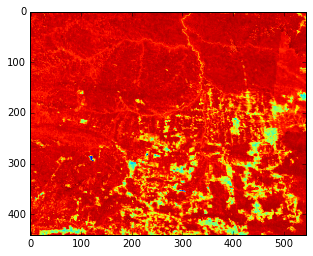

In [4]:
pl.imshow(ndvi_data[:,:,150])

In [5]:
# Convert the uint16 qa to 0-1 float confidence
qaconf = modis.qa_to_qaconf(qa_data)
print qa_data.dtype
print qaconf.dtype

uint16
float32


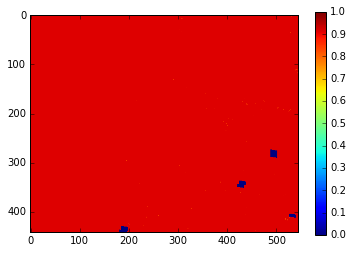

In [6]:
pl.imshow(qaconf[:,:,100], vmin=0, vmax=1); pl.colorbar()

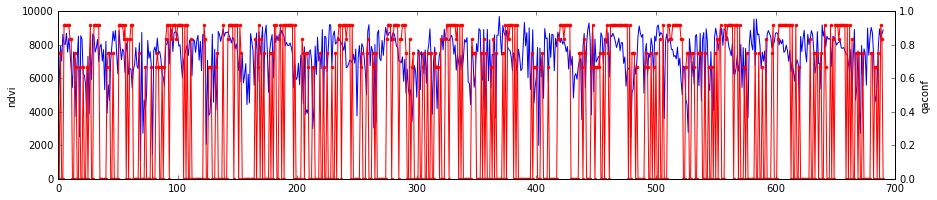

In [7]:
i, j = 350, 450

pl.figure(figsize=(15, 3))
pl.plot(ndvi_data[i, j])
pl.ylim((0, 10000))
pl.ylabel('ndvi')
ax = pl.twinx()
ax.plot(qaconf[i, j], '.-', c='r')
ax.set_ylim((0, 1))
ax.set_ylabel('qaconf')
